In [20]:
from dotenv import load_dotenv
load_dotenv()

import os
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")

In [21]:
from langchain_core.messages import AIMessage,HumanMessage
from pprint import pprint

messages=[AIMessage(content=f"Please tell me how can I help",name="LLMmodel")]
messages.append(HumanMessage(content=f"I want to learn coding",name="Krish"))
messages.append(AIMessage(content=f"Please tell which programming you want to learn",name="LLMmodel"))
messages.append(HumanMessage(content=f"I want to learn Python programming language",name="Krish"))


for m in messages:
    m.pretty_print()


================================== Ai Message ==================================
Name: LLMmodel

Please tell me how can I help
================================ Human Message =================================
Name: Krish

I want to learn coding
================================== Ai Message ==================================
Name: LLMmodel

Please tell which programming you want to learn
================================ Human Message =================================
Name: Krish

I want to learn Python programming language


In [22]:
from langchain_groq import ChatGroq
llm=ChatGroq(model="gemma2-9b-it")
result=llm.invoke(messages)

In [23]:
result.response_metadata

{'token_usage': {'completion_tokens': 743,
  'prompt_tokens': 56,
  'total_tokens': 799,
  'completion_time': 1.3509090910000001,
  'prompt_time': 0.00218245,
  'queue_time': 0.25948857,
  'total_time': 1.353091541},
 'model_name': 'gemma2-9b-it',
 'system_fingerprint': 'fp_10c08bf97d',
 'service_tier': 'on_demand',
 'finish_reason': 'stop',
 'logprobs': None}

In [24]:
def add(a:int , b:int)-> int:
    """Add a anf b 
    Args:
        a(int):first int
        b(int):second int

    Returns:
        int
    """
    return a+b


In [25]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000013D41650F80>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000013D43816270>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

#### Binding tool with llm ####

In [26]:
llm_with_tools=llm.bind_tools([add])
tool_call=llm_with_tools.invoke([HumanMessage(content=f"What is 2 plus 2",name = "Atherv")])
tool_call.tool_calls

[{'name': 'add',
  'args': {'a': 2, 'b': 2},
  'id': '1vj59c36z',
  'type': 'tool_call'}]

#### USING MESSAGE STATE ####

In [27]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage



In [28]:
from langgraph.graph.message import add_messages
from typing import Annotated 
class State(TypedDict):
    message:Annotated[list[AnyMessage],add_messages]

In [29]:
initial_message=[AIMessage(content=f"Please tell me how can i help",name="LLMmodel")]
initial_message.append(HumanMessage(content=f"I want to learn coding",name="Atharv "))
initial_message

[AIMessage(content='Please tell me how can i help', additional_kwargs={}, response_metadata={}, name='LLMmodel'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Atharv ')]

In [30]:
ai_message=AIMessage(content= f"Which programmin language you want to use or learn ", name="LLMModel")
ai_message

AIMessage(content='Which programmin language you want to use or learn ', additional_kwargs={}, response_metadata={}, name='LLMModel')

In [31]:
add_messages(initial_message,ai_message)

[AIMessage(content='Please tell me how can i help', additional_kwargs={}, response_metadata={}, name='LLMmodel', id='379a1b9d-e866-4872-98b4-8304c9c6fbaa'),
 HumanMessage(content='I want to learn coding', additional_kwargs={}, response_metadata={}, name='Atharv ', id='890987ae-f964-48b9-935b-e343fe2d9594'),
 AIMessage(content='Which programmin language you want to use or learn ', additional_kwargs={}, response_metadata={}, name='LLMModel', id='9bdea207-9b87-4461-a912-94dbb461b27a')]

In [32]:
def llm_tool_called(state:State):
    return {"message":[llm_with_tools.invoke(state["message"])]}


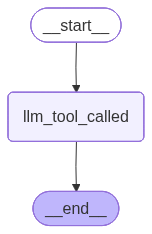

In [33]:
from IPython.display import Image ,display
from langgraph.graph import StateGraph,START,END
builder=StateGraph(State)

builder.add_node("llm_tool_called",llm_tool_called)
builder.add_edge(START,"llm_tool_called")
builder.add_edge("llm_tool_called",END)

graph=builder.compile()

display(Image(graph.get_graph().draw_mermaid_png()))

In [ ]:
messages=graph.invoke({"messages":"What is 2 plus 2"})

for m in messages["messages"]:
    m.preety_print()


BadRequestError: Error code: 400 - {'error': {'message': "'messages' : minimum number of items is 1", 'type': 'invalid_request_error'}}

In [38]:
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

In [44]:
builder = StateGraph(State)

builder.add_node("llm_tool",llm_with_tools)
builder.add_node("tools",ToolNode(tools=[add]))

builder.add_edge(START,"llm_tool")
builder.add_conditional_edges(
    "llm_tool",
    tools_condition
)
builder.add_edge("tools",END)
graph_builder= builder.compile()


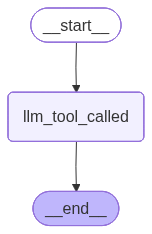

In [42]:
display(Image(graph.get_graph().draw_mermaid_png()))